In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage import morphology
import cv2 as cv2
from skimage import filters

### project links

In [113]:
# https://colab.research.google.com/drive/10p3hoY3mTWSXeIdbjPNMIbwilLbiSN90?usp=sharing#scrollTo=wahUSCWGxD7L
# https://colab.research.google.com/drive/12s-kTA3GaKIcYf3o8ZkifhhffLaYpn6S?usp=sharing#scrollTo=L688DPEmpHrg
# https://colab.research.google.com/drive/1fx6j6ePzAt_LChzU5-tGqgbzWUwFtxKp?usp=sharing#scrollTo=r8Nv2biGui3u

# Example 

## Open a picture which was made under magnifying glass

In [37]:
i = "ISIC_0001101"
pic2 = plt.imread('../data/example_image/new_dataset/only_melanoma/'+i+'.jpg')

## Convert it to grayscale

(1603, 2198, 3)
160.3


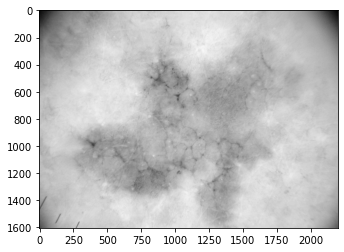

In [57]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

gray = rgb2gray(pic2)
plt.imshow(gray, cmap='gray')
print(pic2.shape)
shape = pic2.shape
# calculation 10%
w = pic2.shape[0] * 0.1
h = pic2.shape[1] * 0.07
print(w)


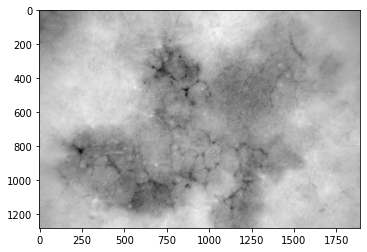

In [58]:
n1 = w
n2 = pic2.shape[0] - w
n3 = h
n4 = pic2.shape[1] - h
im2 = gray[int(n1):int(n2),int(n3):int(n4)]
plt.imshow(im2, cmap='gray')


In [ ]:
pics = pd.read_csv("../data/new_dataset_metadata_raw.csv", sep = ",")
mask = pics["meta.clinical.diagnosis"] == "melanoma"
melanoma_df = pics[mask]
display(melanoma_df)

for i,j in zip(melanoma_df['name'],melanoma_df['meta.clinical.diagnosis']):
    original = "D:/ITU-BOOK/First Year Project/repo/fyp2021p03q10/data/example_image/new_dataset/"+i+".jpg"
    target = r'D:/ITU-BOOK/First Year Project/repo/fyp2021p03q10/data/example_image/new_dataset/only_melanoma'
    shutil.copy(original, target)
    print(i,j)

## Apply two different masks

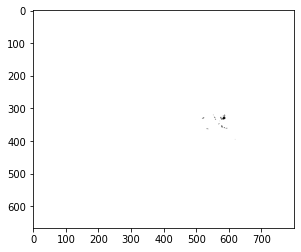

In [31]:
#plt.imshow(gray, cmap='gray')
mymask1 = im2 > 40   #Pixels with higher intensities will be equal to 1 in the mask
mymask2 = im2 < 130  #Pixels with lower intensities will be equal to 1 in the mask
plt.imshow(mymask1, cmap='gray')
#plt.imshow(mymask2, cmap='gray')

(667, 800)
(567, 700)


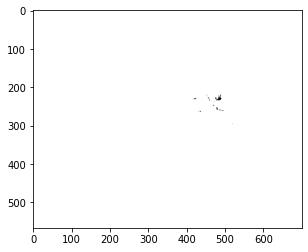

In [32]:
# get shape
mymask1.shape
print(mymask1.shape)

im2 = mymask1[100:800,100:1022]
plt.imshow(im2, cmap='gray')
print(im2.shape)

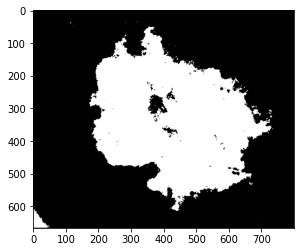

In [33]:
plt.imshow(mymask2, cmap='gray')

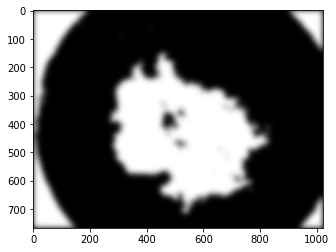

In [182]:
blurred = filters.gaussian(mymask2,sigma=10)

plt.imshow(blurred, cmap='gray')

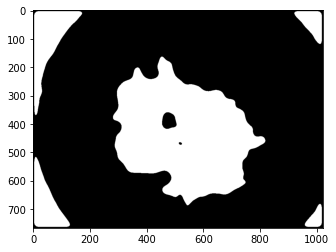

In [195]:
mask2 = blurred > 0.6
plt.imshow(mask2, cmap='gray')

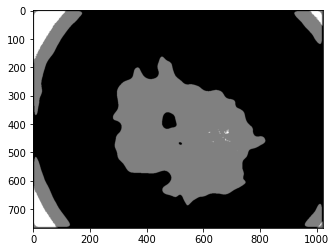

In [202]:
final_mask = (255-mymask1)-(255-mask2)
plt.imshow(final_mask, cmap='gray')

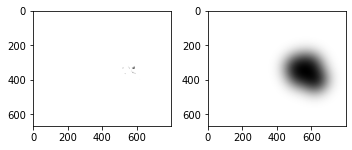

In [35]:
struct_el = morphology.disk(70)

#print(struct_el)
mask_eroded = morphology.binary_erosion(mymask1, struct_el)

# Show side by side

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].imshow(mymask1, cmap='gray')
axes[1].imshow(mask_eroded, cmap='gray')
fig.tight_layout()

blurred = filters.gaussian(mask_eroded,sigma=40)

plt.imshow(blurred, cmap='gray')

# Verify it's smaller
#print(area)
#print(np.sum(mask_eroded))

In [36]:
#plt.imshow(mymask1, cmap='gray')
final_mask = (255-mymask1) + (255-mymask2)
final_mask = mymask1+(255-mask2)
final_mask_er = (255-blurred) + (255-mymask2)
#plt.imshow(final_mask, cmap='gray')

NameError: name 'mask2' is not defined

NameError: name 'final_mask' is not defined

<Figure size 432x288 with 0 Axes>

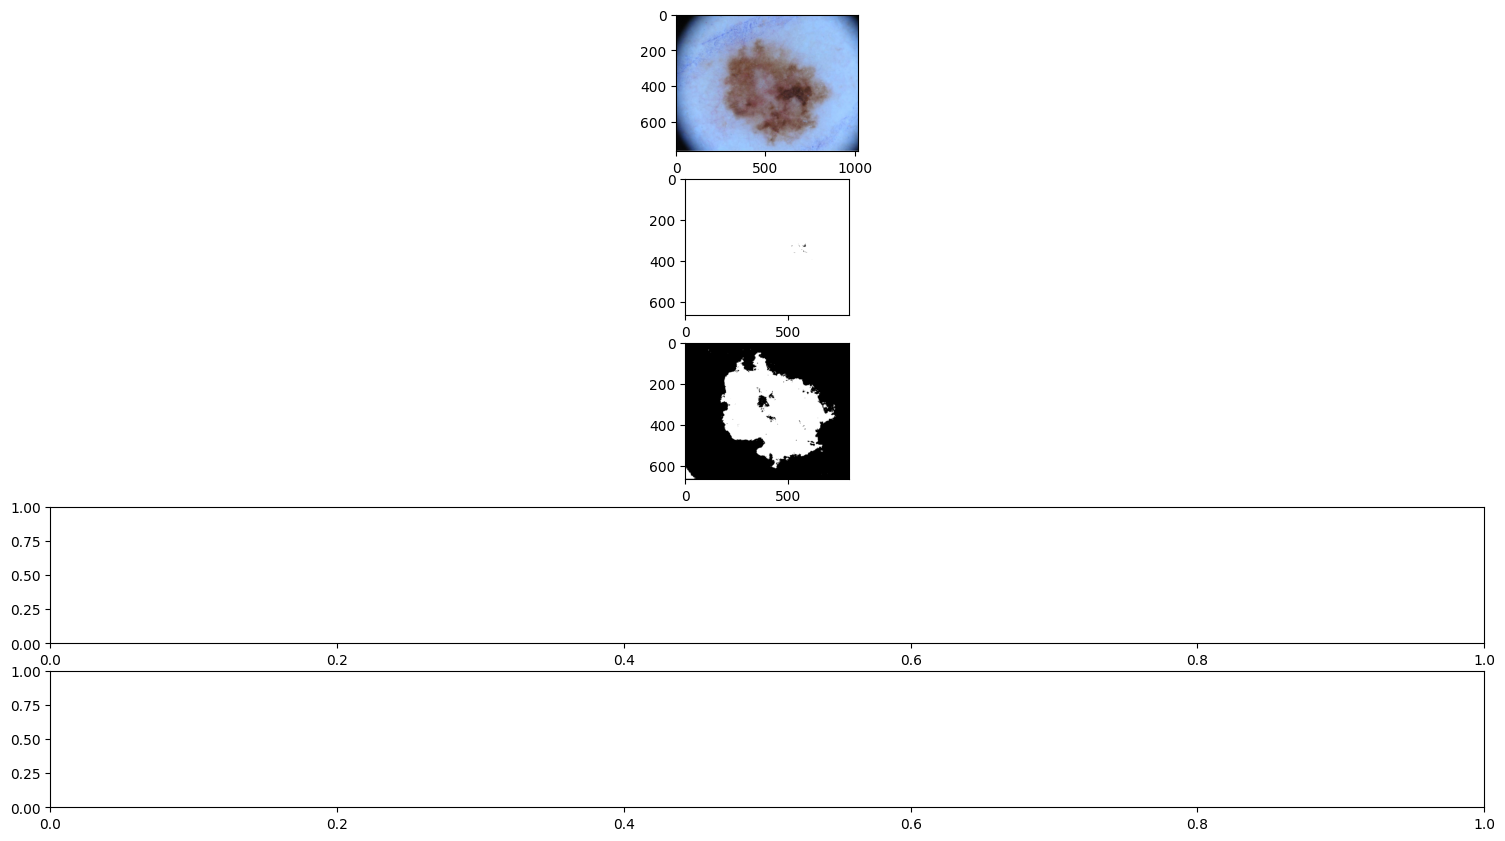

In [34]:
plt.figure()
#figure(figsize=(4, 1), dpi=80)

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(5,1, dpi=100)
f.set_size_inches(18.5, 10.5)

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(pic2, cmap='gray')
axarr[1].imshow(mymask1,cmap='gray')
axarr[2].imshow(mymask2,cmap='gray')
axarr[3].imshow(final_mask,cmap='gray')
axarr[4].imshow(final_mask_er,cmap='gray')